#### importing the required libraries 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.regularizers import L1,L2 

#### importing the dataset 

In [3]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\9.random.csv",header=None)
df.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [4]:
#renaming columns properly
df.columns=["feature_1","feature_2","label"] 
df.head() 

,feature_1,feature_2,label
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [5]:
#creating two other columns 
df["feature_3"]=df["feature_1"]*df["feature_1"]
df["feature_4"]=df["feature_2"]*df["feature_2"]

In [6]:
df.head()

,feature_1,feature_2,label,feature_3,feature_4
0,0.374,1.080,0.0,0.139876,1.166400
1,0.445,1.140,1.0,0.198025,1.299600
2,0.514,1.130,0.0,0.264196,1.276900
3,0.466,1.240,1.0,0.217156,1.537600
4,0.371,0.968,1.0,0.137641,0.937024


#### checking label counts 

In [7]:
df["label"].value_counts()

label
1.0    202
0.0    198
Name: count, dtype: int64

<Axes: >

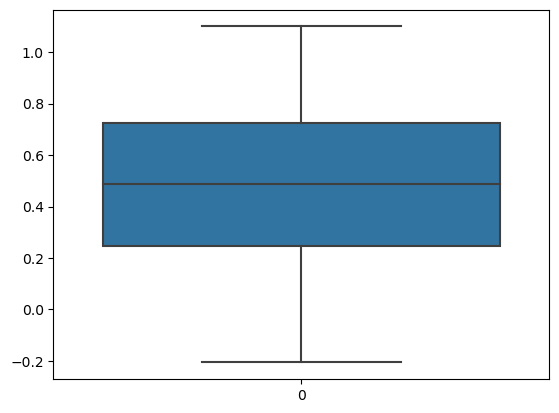

In [8]:
sns.boxplot(df["feature_1"])

<Axes: >

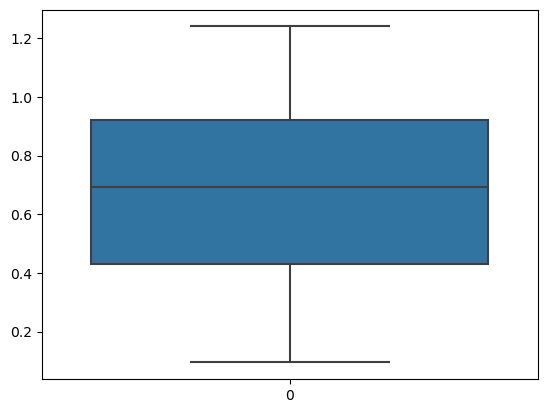

In [9]:
sns.boxplot(df["feature_2"])

<Axes: xlabel='feature_1', ylabel='feature_2'>

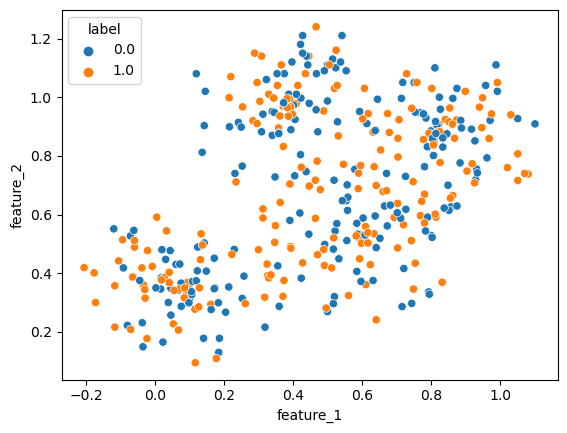

In [10]:
sns.scatterplot(data=df,x="feature_1",y="feature_2",hue="label")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  400 non-null    float64
 1   feature_2  400 non-null    float64
 2   label      400 non-null    float64
 3   feature_3  400 non-null    float64
 4   feature_4  400 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


#### splitting the data into input and output features as x and y 

In [12]:
## splitting the data into input and output
x=df[["feature_1","feature_2","feature_3","feature_4"]]

## typecasting label column as int 
y=df["label"].astype(int)

In [13]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: label, dtype: int32

#### splitting the data into train and test 

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(360, 4) (360,)
(40, 4) (40,)


#### scaling the input features of both X_train,X_test 

In [15]:
scalar=StandardScaler()

### scaling X_train
X_train=scalar.fit_transform(X_train)



## scaling X_test 
X_test=scalar.transform(X_test)

#### converting input features into principal components 

In [16]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 0)

pca.fit(X_train)

PCA(random_state=0)

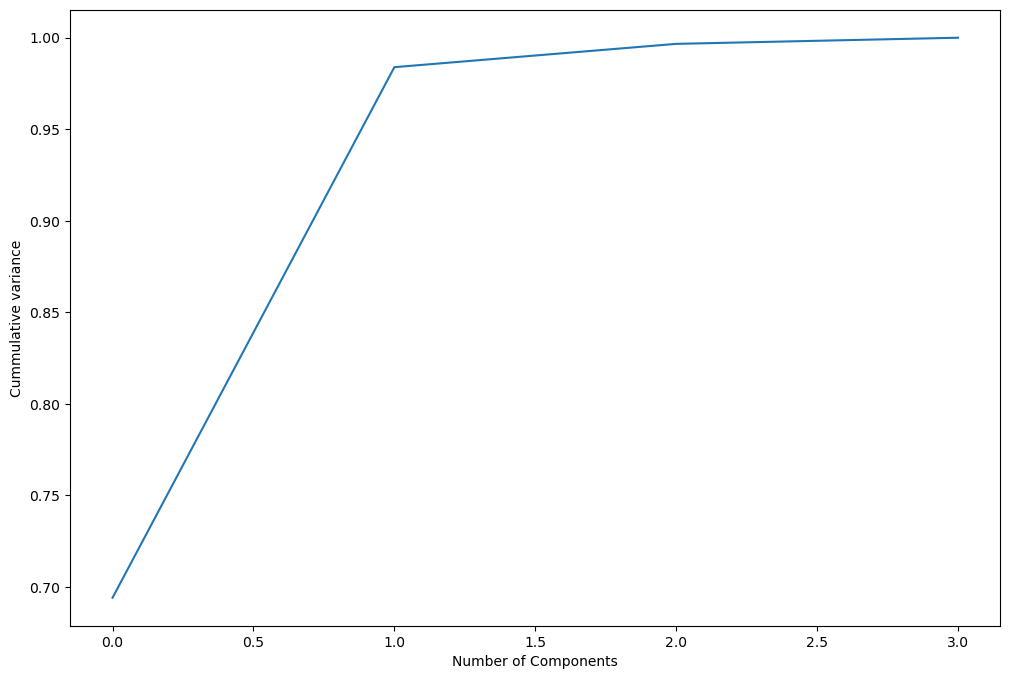

In [17]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.69405901, 0.98391266, 0.99664887, 1.        ])

In [19]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components =2, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [20]:
X_train_pca.shape

(360, 2)

In [21]:
X_test_pca = pca_final.transform(X_test)

#### building the logical structure 

In [22]:
model=Sequential()
model.add(Dense(16,activation="relu",input_dim=2))
model.add(Dense(10,activation="relu"))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 291 (1.14 KB)
Trainable params: 291 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [24]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train_pca,y_train,batch_size=30,epochs=1000,validation_split=0.1) 

Epoch 1/1000
11/11 [==============================] - 1s 36ms/step - loss: 0.7337 - accuracy: 0.5031 - val_loss: 0.7499 - val_accuracy: 0.5556
Epoch 2/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.7216 - accuracy: 0.5062 - val_loss: 0.7298 - val_accuracy: 0.5556
Epoch 3/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.7134 - accuracy: 0.4938 - val_loss: 0.7191 - val_accuracy: 0.5833
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.7090 - accuracy: 0.4969 - val_loss: 0.7106 - val_accuracy: 0.6111
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.7059 - accuracy: 0.5062 - val_loss: 0.7066 - val_accuracy: 0.6111
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.7038 - accuracy: 0.5031 - val_loss: 0.7036 - val_accuracy: 0.6111
Epoch 7/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.7023 - accuracy: 0.5031 - val_loss: 0.7015 - val_accuracy: 0.6111
Epoc

11/11 [==============================] - 0s 7ms/step - loss: 0.6891 - accuracy: 0.5525 - val_loss: 0.7003 - val_accuracy: 0.5278
Epoch 116/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6890 - accuracy: 0.5494 - val_loss: 0.7002 - val_accuracy: 0.5278
Epoch 117/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.5494 - val_loss: 0.7003 - val_accuracy: 0.5278
Epoch 118/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6890 - accuracy: 0.5432 - val_loss: 0.7003 - val_accuracy: 0.5278
Epoch 119/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5494 - val_loss: 0.7003 - val_accuracy: 0.5278
Epoch 120/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.5494 - val_loss: 0.7003 - val_accuracy: 0.5278
Epoch 121/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5463 - val_loss: 0.7002 - val_accuracy: 0.5278
Epoch 1

Epoch 172/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6878 - accuracy: 0.5340 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 173/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6880 - accuracy: 0.5340 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 174/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6877 - accuracy: 0.5432 - val_loss: 0.7002 - val_accuracy: 0.5000
Epoch 175/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6879 - accuracy: 0.5340 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 176/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.6878 - accuracy: 0.5309 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 177/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6879 - accuracy: 0.5401 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 178/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6877 - accuracy: 0.5340 - val_loss: 0.7006 - val_accura

Epoch 229/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6871 - accuracy: 0.5309 - val_loss: 0.7011 - val_accuracy: 0.4722
Epoch 230/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6873 - accuracy: 0.5309 - val_loss: 0.7014 - val_accuracy: 0.5000
Epoch 231/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6870 - accuracy: 0.5278 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 232/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6871 - accuracy: 0.5340 - val_loss: 0.7018 - val_accuracy: 0.5000
Epoch 233/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6874 - accuracy: 0.5370 - val_loss: 0.7014 - val_accuracy: 0.4722
Epoch 234/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6871 - accuracy: 0.5340 - val_loss: 0.7014 - val_accuracy: 0.4722
Epoch 235/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.5340 - val_loss: 0.7012 - val_accuracy

Epoch 286/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6866 - accuracy: 0.5370 - val_loss: 0.7016 - val_accuracy: 0.4722
Epoch 287/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6865 - accuracy: 0.5278 - val_loss: 0.7016 - val_accuracy: 0.4722
Epoch 288/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6867 - accuracy: 0.5370 - val_loss: 0.7015 - val_accuracy: 0.4722
Epoch 289/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6863 - accuracy: 0.5309 - val_loss: 0.7016 - val_accuracy: 0.4722
Epoch 290/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6866 - accuracy: 0.5309 - val_loss: 0.7019 - val_accuracy: 0.4722
Epoch 291/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6865 - accuracy: 0.5340 - val_loss: 0.7022 - val_accuracy: 0.4722
Epoch 292/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6865 - accuracy: 0.5401 - val_loss: 0.7021 - val_accuracy:

Epoch 343/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6857 - accuracy: 0.5401 - val_loss: 0.7021 - val_accuracy: 0.4722
Epoch 344/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6859 - accuracy: 0.5247 - val_loss: 0.7022 - val_accuracy: 0.4722
Epoch 345/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6861 - accuracy: 0.5216 - val_loss: 0.7026 - val_accuracy: 0.4722
Epoch 346/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6862 - accuracy: 0.5309 - val_loss: 0.7021 - val_accuracy: 0.4722
Epoch 347/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6860 - accuracy: 0.5340 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 348/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6861 - accuracy: 0.5309 - val_loss: 0.7028 - val_accuracy: 0.4722
Epoch 349/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6861 - accuracy: 0.5340 - val_loss: 0.7030 - val_accura

Epoch 400/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6853 - accuracy: 0.5401 - val_loss: 0.7027 - val_accuracy: 0.4722
Epoch 401/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6855 - accuracy: 0.5463 - val_loss: 0.7028 - val_accuracy: 0.4444
Epoch 402/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6856 - accuracy: 0.5370 - val_loss: 0.7030 - val_accuracy: 0.4444
Epoch 403/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6852 - accuracy: 0.5370 - val_loss: 0.7031 - val_accuracy: 0.4444
Epoch 404/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6858 - accuracy: 0.5309 - val_loss: 0.7027 - val_accuracy: 0.4722
Epoch 405/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6854 - accuracy: 0.5309 - val_loss: 0.7028 - val_accuracy: 0.4722
Epoch 406/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6855 - accuracy: 0.5370 - val_loss: 0.7026 - val_accuracy:

Epoch 457/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6850 - accuracy: 0.5401 - val_loss: 0.7040 - val_accuracy: 0.4444
Epoch 458/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.5247 - val_loss: 0.7039 - val_accuracy: 0.4444
Epoch 459/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6850 - accuracy: 0.5216 - val_loss: 0.7036 - val_accuracy: 0.4444
Epoch 460/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6849 - accuracy: 0.5401 - val_loss: 0.7037 - val_accuracy: 0.4444
Epoch 461/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6848 - accuracy: 0.5247 - val_loss: 0.7036 - val_accuracy: 0.4444
Epoch 462/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6852 - accuracy: 0.5401 - val_loss: 0.7039 - val_accuracy: 0.4444
Epoch 463/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6851 - accuracy: 0.5370 - val_loss: 0.7035 - val_accuracy

Epoch 514/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6844 - accuracy: 0.5340 - val_loss: 0.7029 - val_accuracy: 0.4444
Epoch 515/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6846 - accuracy: 0.5370 - val_loss: 0.7028 - val_accuracy: 0.4444
Epoch 516/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.5309 - val_loss: 0.7032 - val_accuracy: 0.4444
Epoch 517/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6844 - accuracy: 0.5340 - val_loss: 0.7034 - val_accuracy: 0.4444
Epoch 518/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6846 - accuracy: 0.5278 - val_loss: 0.7035 - val_accuracy: 0.4444
Epoch 519/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6843 - accuracy: 0.5370 - val_loss: 0.7036 - val_accuracy: 0.4444
Epoch 520/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6851 - accuracy: 0.5463 - val_loss: 0.7034 - val_accuracy:

Epoch 571/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.5401 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 572/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6838 - accuracy: 0.5432 - val_loss: 0.7034 - val_accuracy: 0.4444
Epoch 573/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6839 - accuracy: 0.5309 - val_loss: 0.7035 - val_accuracy: 0.4444
Epoch 574/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6842 - accuracy: 0.5401 - val_loss: 0.7040 - val_accuracy: 0.4444
Epoch 575/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6844 - accuracy: 0.5340 - val_loss: 0.7038 - val_accuracy: 0.4444
Epoch 576/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6840 - accuracy: 0.5247 - val_loss: 0.7034 - val_accuracy: 0.4444
Epoch 577/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6844 - accuracy: 0.5340 - val_loss: 0.7036 - val_accuracy:

Epoch 628/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6833 - accuracy: 0.5340 - val_loss: 0.7026 - val_accuracy: 0.4444
Epoch 629/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6838 - accuracy: 0.5340 - val_loss: 0.7030 - val_accuracy: 0.4444
Epoch 630/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6837 - accuracy: 0.5247 - val_loss: 0.7030 - val_accuracy: 0.4444
Epoch 631/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6837 - accuracy: 0.5216 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 632/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6844 - accuracy: 0.5309 - val_loss: 0.7023 - val_accuracy: 0.4444
Epoch 633/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6834 - accuracy: 0.5309 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 634/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6833 - accuracy: 0.5340 - val_loss: 0.7029 - val_accuracy:

Epoch 685/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6830 - accuracy: 0.5370 - val_loss: 0.7028 - val_accuracy: 0.4444
Epoch 686/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6828 - accuracy: 0.5247 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 687/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6832 - accuracy: 0.5216 - val_loss: 0.7022 - val_accuracy: 0.4444
Epoch 688/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6828 - accuracy: 0.5494 - val_loss: 0.7025 - val_accuracy: 0.4444
Epoch 689/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6830 - accuracy: 0.5185 - val_loss: 0.7022 - val_accuracy: 0.4444
Epoch 690/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6831 - accuracy: 0.5340 - val_loss: 0.7022 - val_accuracy: 0.4444
Epoch 691/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6831 - accuracy: 0.5370 - val_loss: 0.7021 - val_accuracy

Epoch 742/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6830 - accuracy: 0.5340 - val_loss: 0.7026 - val_accuracy: 0.4444
Epoch 743/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6823 - accuracy: 0.5370 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 744/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.6823 - accuracy: 0.5370 - val_loss: 0.7031 - val_accuracy: 0.4444
Epoch 745/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6827 - accuracy: 0.5247 - val_loss: 0.7027 - val_accuracy: 0.4444
Epoch 746/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: 0.5154 - val_loss: 0.7019 - val_accuracy: 0.4444
Epoch 747/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6828 - accuracy: 0.5586 - val_loss: 0.7029 - val_accuracy: 0.4444
Epoch 748/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6826 - accuracy: 0.5278 - val_loss: 0.7028 - val_accuracy

Epoch 799/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6822 - accuracy: 0.5309 - val_loss: 0.7009 - val_accuracy: 0.4444
Epoch 800/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6824 - accuracy: 0.5401 - val_loss: 0.7013 - val_accuracy: 0.4444
Epoch 801/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6819 - accuracy: 0.5525 - val_loss: 0.7011 - val_accuracy: 0.4444
Epoch 802/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6820 - accuracy: 0.5247 - val_loss: 0.7010 - val_accuracy: 0.4444
Epoch 803/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.5401 - val_loss: 0.7015 - val_accuracy: 0.4722
Epoch 804/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6817 - accuracy: 0.5370 - val_loss: 0.7014 - val_accuracy: 0.4722
Epoch 805/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.5463 - val_loss: 0.7015 - val_accuracy

Epoch 856/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6813 - accuracy: 0.5216 - val_loss: 0.7001 - val_accuracy: 0.4722
Epoch 857/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.5278 - val_loss: 0.7000 - val_accuracy: 0.4722
Epoch 858/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.5370 - val_loss: 0.7002 - val_accuracy: 0.4722
Epoch 859/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6811 - accuracy: 0.5340 - val_loss: 0.6997 - val_accuracy: 0.4444
Epoch 860/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6812 - accuracy: 0.5525 - val_loss: 0.7003 - val_accuracy: 0.4722
Epoch 861/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6823 - accuracy: 0.5432 - val_loss: 0.7007 - val_accuracy: 0.4722
Epoch 862/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6812 - accuracy: 0.5370 - val_loss: 0.7007 - val_accuracy:

Epoch 913/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6807 - accuracy: 0.5401 - val_loss: 0.6998 - val_accuracy: 0.4722
Epoch 914/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6807 - accuracy: 0.5309 - val_loss: 0.6997 - val_accuracy: 0.4722
Epoch 915/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6805 - accuracy: 0.5463 - val_loss: 0.7001 - val_accuracy: 0.4722
Epoch 916/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6806 - accuracy: 0.5401 - val_loss: 0.7007 - val_accuracy: 0.4722
Epoch 917/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6807 - accuracy: 0.5309 - val_loss: 0.6998 - val_accuracy: 0.4722
Epoch 918/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.6806 - accuracy: 0.5463 - val_loss: 0.6995 - val_accuracy: 0.4722
Epoch 919/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6805 - accuracy: 0.5494 - val_loss: 0.7000 - val_accuracy:

Epoch 970/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6801 - accuracy: 0.5463 - val_loss: 0.7002 - val_accuracy: 0.4722
Epoch 971/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6800 - accuracy: 0.5463 - val_loss: 0.6994 - val_accuracy: 0.4722
Epoch 972/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6800 - accuracy: 0.5309 - val_loss: 0.6990 - val_accuracy: 0.4722
Epoch 973/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6799 - accuracy: 0.5463 - val_loss: 0.6989 - val_accuracy: 0.4722
Epoch 974/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6799 - accuracy: 0.5463 - val_loss: 0.6992 - val_accuracy: 0.4722
Epoch 975/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6809 - accuracy: 0.5278 - val_loss: 0.6986 - val_accuracy: 0.4722
Epoch 976/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6800 - accuracy: 0.5463 - val_loss: 0.6981 - val_accuracy

#### plotting the train test loss 

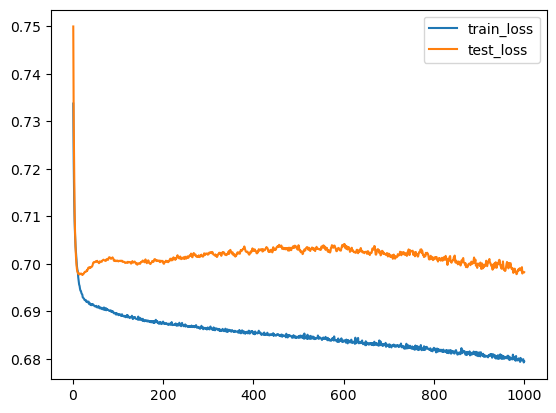

In [25]:
plt.plot(range(1,1001),history.history["loss"],label="train_loss")
plt.plot(range(1,1001),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### finding the predicted values using model 

In [26]:
predicted=model.predict(X_test_pca)
predicted

2/2 [==============================] - 0s 8ms/step


array([[0.5015094 ],
       [0.524197  ],
       [0.45640174],
       [0.53550106],
       [0.53163034],
       [0.50997484],
       [0.5026032 ],
       [0.53581136],
       [0.53903544],
       [0.45993367],
       [0.59713167],
       [0.50970435],
       [0.49408996],
       [0.533032  ],
       [0.5740115 ],
       [0.6118547 ],
       [0.4961708 ],
       [0.49883908],
       [0.5100383 ],
       [0.5081468 ],
       [0.34358466],
       [0.5383432 ],
       [0.48396078],
       [0.57596207],
       [0.5727156 ],
       [0.51783735],
       [0.47645786],
       [0.5544802 ],
       [0.43119654],
       [0.48156774],
       [0.56463957],
       [0.53322214],
       [0.55190295],
       [0.49472845],
       [0.5186551 ],
       [0.42587426],
       [0.5824713 ],
       [0.48573506],
       [0.5723114 ],
       [0.5443104 ]], dtype=float32)

#### converting the predicted probablities to the respective labels

In [27]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]])

#### evaluating the model 

0.475


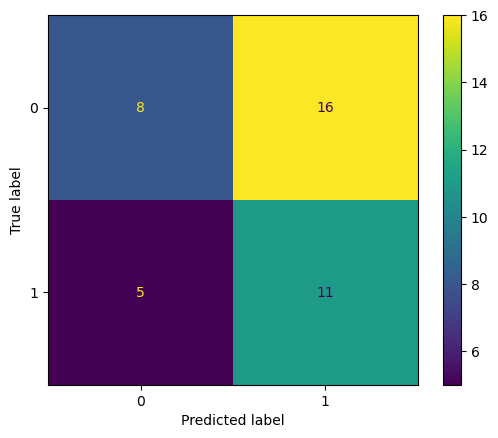

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### creating the decision surface 

In [29]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 20s 2ms/step


<Axes: >

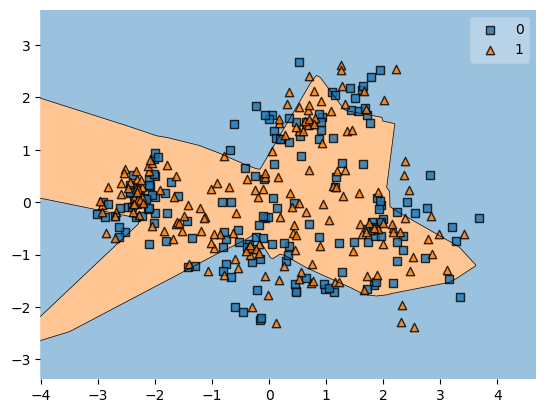

In [30]:
plot_decision_regions(X_train_pca,y_train.values,clf=model)

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

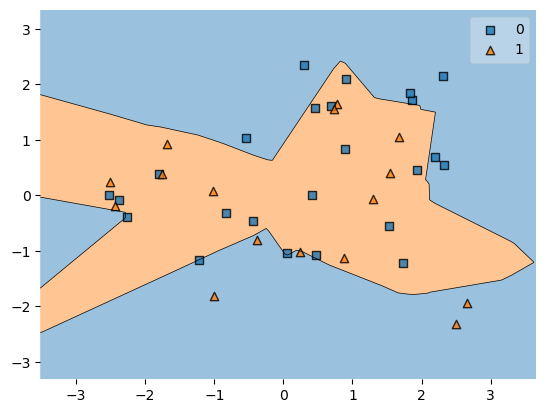

In [31]:
#for test data 
plot_decision_regions(X_test_pca,y_test.values,clf=model)

#### Model Summary 


- This neural network model is showing accuracy of 47.5 percent
- We have used 3 hidden layers.
- In the First Hidden layers we have used 16 neurons,activation function as relu.
- In the second Hidden layers we have used 10 neurons,activation function as relu.
- In the third hidden layers we have used 6 neurons,activation function as relu.
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 30 with learning rate of 0.01. 
- No of epochs used for training this model is 1000. 
- We added two more features in the input made from original features and applied PCA to get the best two features.Even after doing feature enginnering we are not able to extract the pattern because there exist no relationship between two original features. 